In [71]:
from sklearn.linear_model import LinearRegression
import numpy as np
import copy

%matplotlib inline
import matplotlib.pyplot as plt

import operator as op


# approach 1

[1, 11, 5.0, 28.33333333]

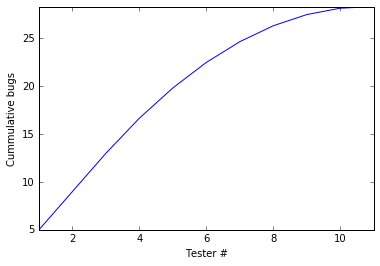

In [3]:
tmp_l = np.array([ 5.        ,  9.        , 13.        , 16.66666667, 19.83333333,
       22.5       , 24.66666667, 26.33333333, 27.5       , 28.16666667,
       28.33333333])
tmp_l2 = [ele+1 for ele in range(len(tmp_l))]

plt.plot(tmp_l2, tmp_l)
plt.xlabel('Tester #')
plt.ylabel('Cummulative bugs')
plt.axis([1,len(tmp_l2),np.min(tmp_l), np.max(tmp_l)])


In [4]:
1. Figure shows the num of cummulative bugs reported by testers. The figure converges to a value (total num of bugs) as we 
   keep increasing the num of testers
    
2. I am assuming the graph of cummulative bugs vs Tester # (or the reporting step) as above (i.e with a decreasing slope/gradient)
   , i.e. as we go from tester num n to tester n+1 the num of new bugs the tester adds to the existing set of bugs decreases. 
    Hence the slope of the curve decreases
    
3. Let num of bugs = ni*x1+n2*x2+n3*x3..... where n1, n2, n3... are the num of bugs reported by tester 1,2,3....and x1,x2,x3 are
   the ratio of n1,n2,n3 they add to the existing set of bugs. The value of x1 would always be one. 
   Let's say If we have inputs from 2 testers ['a','b','c','d'], ['a','b','e','f'] we know the value of x1=1 and x2 = 2/4 
   since only bugs 'e' and 'f' are added (out of the 4 bugs reported by tester 2) to the existing set (already reported by 
   tester 1)
    
4. Now since we know value of x1 and x2 , we can fit a line to estimate x3, x4... as a fn of reporting step or tester #
   and see when does that line meet zero. When it meets zero that means that many testers are required to report all the bugs.
   Let's say that number comes out to be 10..for the remaining 8 testers we can assume the num of bugs reported i.e. n3,n4..
   are all same and equal to the mean of n1 and n2. Now we know the value of n1,n2,n3...n10 and x1,x2,....x10. We can calculate
   the total num of bugs (= n1*x1+n2*x2+...n10*x10)

5. if the list of reported bugs is ['a','b','c','d'], ['g','h','e','f'] i.e. x1=1 and x2=1 then user needs
   to give a value of total num of testers, default value is 1000. This means it will take 1000 testers to report all the bugs, 
   and then the values of x3,x4 .... can be found out from the line which passes through (1,1) and (1000,0)

    

SyntaxError: invalid syntax (<ipython-input-4-572e5e7f543e>, line 1)

In [5]:
class Num_Bugs:
    
    def __init__(self,max_steps, bug_listoflists ):
        
        self.max_steps = max_steps
        self.bugs = bug_listoflists

    def get_fraction_increment(self, list_of_lists):

        frac_list = []    
        list_n = []
        union_n_min_1 = []

        for i, ele in enumerate(list_of_lists):


                list_n += ele

                union_n = np.unique(list_n).tolist()

                frac = (1.*(len(union_n)-len(union_n_min_1)))/len(ele)

                union_n_min_1 = copy.deepcopy(union_n)

                frac_list.append(frac)

        return frac_list


    def get_total_bugs(self):


        frac_arr = self.get_fraction_increment(self.bugs)
        reporting_steps = [i+1 for i in range(len(self.bugs))]
        max_rep_step = np.max(reporting_steps)
        fit_line = LinearRegression()
        X  = np.array(reporting_steps).reshape(-1,1)
        Y = frac_arr
        fit_line.fit(X,Y)
        slope = fit_line.coef_[0]
        y_intercept = fit_line.intercept_

        if slope >= 0:
            slope = ((0-1)*1.)/(self.max_steps-1)

        x_intercept = int(round(((-1)*y_intercept)/slope,0))
        length_l = [len(ele) for ele in bugs]
        mean = int(round(np.mean(length_l),0))
        if len(length_l) < x_intercept:
            diff = x_intercept - len(length_l)
            for i in range(diff):
                length_l.append(mean)
                tmp_ele = (slope*1.*(max_rep_step+(i+1)))+y_intercept
                if tmp_ele<0:
                    tmp_ele=0
                frac_arr.append(tmp_ele)

        Num_bugs = np.sum(np.array(length_l)*np.array(frac_arr))
        cum_sum_num_bugs = np.array(length_l)*np.array(frac_arr)
        cum_sum_num_bugs = cum_sum_num_bugs.cumsum()
        num_steps = [i+1 for i in range(len(cum_sum_num_bugs))]

        return Num_bugs, cum_sum_num_bugs, num_steps, frac_arr



In [6]:
max_steps = 1000
bugs = [['a','b','c','d','l'],['h','g','e','f'],['x','y','z','a','o']]

numbugs_cl = Num_Bugs(max_steps, bugs)
Num_bugs, cum_sum_num_bugs, num_steps, frac_arr = numbugs_cl.get_total_bugs()



In [8]:
print 'total num of bugs is : ',Num_bugs

total num of bugs is :  28.333333333333336


[1, 11, 0, 1.1]

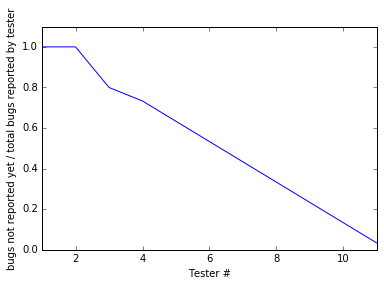

In [6]:
plt.plot(num_steps, frac_arr)
plt.xlabel('Tester #')
plt.ylabel('bugs not reported yet / total bugs reported by tester')
plt.axis([1,len(num_steps),0,1.1])


[1, 11, 5.0, 28.333333333333343]

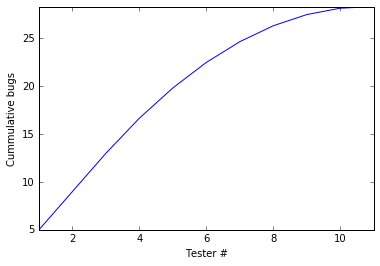

In [7]:
plt.plot(num_steps, cum_sum_num_bugs)
plt.xlabel('Tester #')
plt.ylabel('Cummulative bugs')
plt.axis([1,len(num_steps),np.min(cum_sum_num_bugs), np.max(cum_sum_num_bugs)])


In [9]:
max_steps = 1000
bugs = [['a','b','c','d','e'],['d','e','f','g','h']]

numbugs_cl = Num_Bugs(max_steps, bugs)
Num_bugs, cum_sum_num_bugs, num_steps, frac_arr = numbugs_cl.get_total_bugs()

print 'total num of bugs is : ',Num_bugs


total num of bugs is :  9.000000000000002


[1, 4, 0, 1.1]

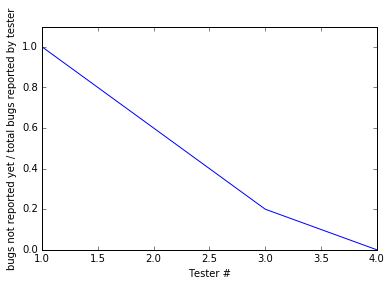

In [10]:
plt.plot(num_steps, frac_arr)
plt.xlabel('Tester #')
plt.ylabel('bugs not reported yet / total bugs reported by tester')
plt.axis([1,len(num_steps),0,1.1])


[1, 4, 5.0, 9.000000000000002]

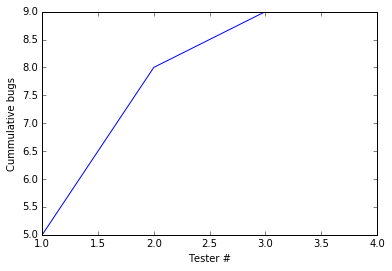

In [11]:
plt.plot(num_steps, cum_sum_num_bugs)
plt.xlabel('Tester #')
plt.ylabel('Cummulative bugs')
plt.axis([1,len(num_steps),np.min(cum_sum_num_bugs), np.max(cum_sum_num_bugs)])


In [7]:
max_steps = 1000
bugs = [['a','b','c','d','e'],['d','e','f','g','h']]

numbugs_cl = Num_Bugs(max_steps, bugs)
Num_bugs, cum_sum_num_bugs, num_steps, frac_arr = numbugs_cl.get_total_bugs()

print 'total num of bugs is : ',Num_bugs


total num of bugs is :  9.000000000000002


[1, 4, 0, 1.1]

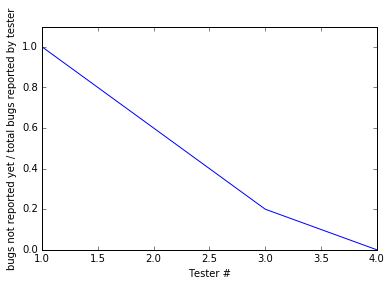

In [8]:
plt.plot(num_steps, frac_arr)
plt.xlabel('Tester #')
plt.ylabel('bugs not reported yet / total bugs reported by tester')
plt.axis([1,len(num_steps),0,1.1])


[1, 4, 5.0, 9.000000000000002]

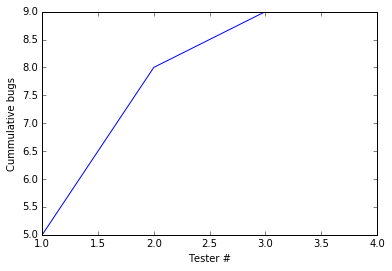

In [9]:
plt.plot(num_steps, cum_sum_num_bugs)
plt.xlabel('Tester #')
plt.ylabel('Cummulative bugs')
plt.axis([1,len(num_steps),np.min(cum_sum_num_bugs), np.max(cum_sum_num_bugs)])


In [26]:
max_steps = 1000
bugs = [['a','b','c','d','e'],['d','e','f','g','h'],['x','y','z','a']]

numbugs_cl = Num_Bugs(max_steps, bugs)
Num_bugs, cum_sum_num_bugs, num_steps, frac_arr = numbugs_cl.get_total_bugs()

print 'total num of bugs is : ',Num_bugs


total num of bugs is :  18.08333333333334


[1, 8, 0, 1.1]

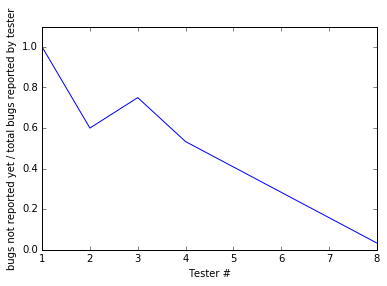

In [27]:
plt.plot(num_steps, frac_arr)
plt.xlabel('Tester #')
plt.ylabel('bugs not reported yet / total bugs reported by tester')
plt.axis([1,len(num_steps),0,1.1])


[1, 8, 5.0, 18.08333333333334]

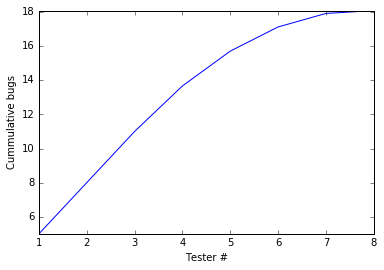

In [28]:
plt.plot(num_steps, cum_sum_num_bugs)
plt.xlabel('Tester #')
plt.ylabel('Cummulative bugs')
plt.axis([1,len(num_steps),np.min(cum_sum_num_bugs), np.max(cum_sum_num_bugs)])


# approach 2

In [11]:

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, xrange(n, n-r, -1), 1)
    denom = reduce(op.mul, xrange(1, r+1), 1)
    return numer//denom

In [59]:
class Num_Bugs2:
    
    def __init__(self, bug_listoflists ):
        
        self.bugs = bug_listoflists

        
    def flatten_list(self, chunks):

        b = []
        for ele in chunks:
            b+=ele

        return b    

    def get_fraction_increment(self, list_of_lists):

        len_list_n_min_1 = []
        num_rep_list = []
        num_new_added_list = []
        ele_len_list = []
        list_n = []
        union_n_min_1 = []

        for i, ele in enumerate(list_of_lists):


                list_n += ele

                union_n = np.unique(list_n).tolist()

                new_added = len(union_n)-len(union_n_min_1)
                repitition = len(np.intersect1d(ele,union_n_min_1))
                
                len_list_n_min_1.append(len(union_n_min_1))
                
                union_n_min_1 = copy.deepcopy(union_n)

                num_rep_list.append(repitition)
                num_new_added_list.append(new_added)
                ele_len_list.append(len(ele))

        return len_list_n_min_1, num_rep_list, num_new_added_list, ele_len_list


    def get_total_bugs(self, n):


        len_list_n_min_1, num_rep_list, num_new_added_list, ele_len_list = self.get_fraction_increment(self.bugs)
        
        p_terms = []
        for i, ele in enumerate(self.bugs):
            p_term_num = 1.*(ncr(n-len_list_n_min_1[i],num_new_added_list[i] ))*(ncr(len_list_n_min_1[i],num_rep_list[i]))
            p_term_den = ncr(n, ele_len_list[i])
            p_term_ele = (1.*p_term_num)/p_term_den
            p_terms.append(p_term_ele)
            
        prob = 1.
        for ele  in p_terms:
            prob = prob*ele
        return prob
    
    def plot_dist(self, max_steps):
        
        min_len = len(set(self.flatten_list(self.bugs)))
        steps = [ele for ele in  range(min_len, min_len+max_steps)]
        probs = [self.get_total_bugs(ele) for ele in  range(min_len, min_len+max_steps)]
        return steps, probs

    
    
    

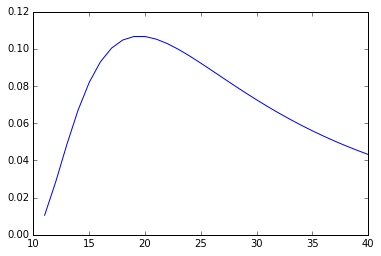

In [70]:
bugs = [['a','b','c','d','e'],['d','e','f','g','h'],['x','y','z','a']]

num_bugs = Num_Bugs2(bugs)
x,y = num_bugs.plot_dist(30)
plt.plot(x,y)

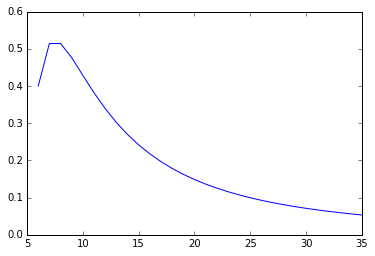

In [65]:
bugs = [['a','b','c','d'],['x','y','b','a']]

num_bugs = Num_Bugs2(bugs)
x,y = num_bugs.plot_dist(30)
plt.plot(x,y)

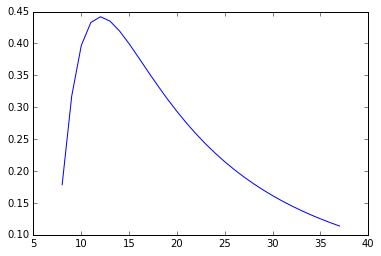

In [72]:
bugs = [['a','b','c','d','e'],['d','e','f','g','h']]

num_bugs = Num_Bugs2(bugs)
x,y = num_bugs.plot_dist(30)
plt.plot(x,y)

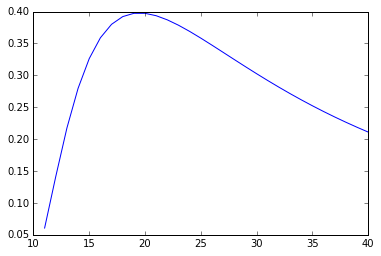

In [73]:
bugs = [['a','b','c','d','e'],['d','e','f','g','h','x','y','z']]

num_bugs = Num_Bugs2(bugs)
x,y = num_bugs.plot_dist(30)
plt.plot(x,y)

# random

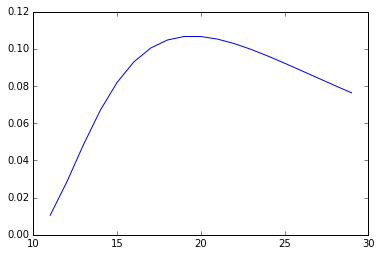

In [68]:
bugs = [['a','b','c','d','e'],['d','e','f','g','h'],['x','y','z','a']]

def func(n):
    a = (1.*(ncr(5,2)*ncr(n-5,3)*ncr(8,1)*ncr(n-8,3)))/(ncr(n,5)*ncr(n,4))
    return a

steps = [ele for ele in range(11,30)]
ys = [func(ele) for ele in range(11,30)]

steps = [ele for ele in range(11,30)]
ys = [func(ele) for ele in range(11,30)]

plt.plot(steps, ys)

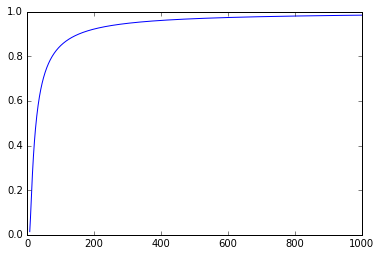

In [69]:
bugs = [['a','b','c','d'],['e','f','g','h']]

def func(n):
    a = (1.*ncr(n-4,4)/ncr(n,4))
    return a

steps = [ele for ele in range(8,1000)]
ys = [func(ele) for ele in range(8,1000)]

plt.plot(steps, ys)